### Stretched LDA Li_2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter
import CADMium

from copy import copy

In [2]:
# dis_eq      = np.linspace(1.0,5,30)
# dis_st      = np.linspace(5.1,10,10)
# dis_eq      = np.linspace(1.0,5,10)
# dis_st      = np.linspace(5.1,10,3)
# distances   = np.concatenate((dis_eq, dis_st))
distances = [5.122] 
# distances = [2.0]
energy  = []

for d in distances:
    a = d/2
    Za, Zb =  3,3
    pol = 2

    #Set up grid
    NP = 7
    NM = [6,6]
    L = np.arccosh(15/a)
    loc = np.array(range(-4,5)) #Stencil outline
    grid = Psgrid(NP, NM, a, L, loc)
    grid.initialize()


    #Fragment a electrons [alpha, beta]

    #Fragment a electrons [alpha, beta]
    Nmo_a = [[1,2]]; Nmo_A = [[2,1]] #Number of molecular orbitals to calculate
    N_a   = [[1,2]]; N_A   = [[2,1]]
    nu_a = 0.5

    #Fragment b electrons
    Nmo_b = [[1,2]]; Nmo_B = [[2,1]]
    N_b   = [[1,2]]; N_B   = [[2,1]] 
    nu_b = 0.5

    #Molecular elctron configuration
    Nmo_m = [[3,3]]
    N_m   = [[3,3]]



    part = Partition(grid, Za, Zb, pol, [Nmo_a, Nmo_A], [N_a, N_A], nu_a, 
                                        [Nmo_b, Nmo_B], [N_b, N_B], nu_b, {    "AB_SYM"            : True,
                                                                               "interaction_type"  : "dft", 
                                                                               "kinetic_part_type" : "inversion",
                                                                               "hxc_part_type"     : "exact",
#                                                                                "k_family"          : "gga", 
#                                                                                "ke_func_id"        : 500,
                                                                                })

    #Setup inverter object
    mol_solver = Pssolver(grid, Nmo_m, N_m)
    part.inverter = Inverter(grid, mol_solver, {  "AB_SYM"         : True, 
                                                  "use_iterative"  : False,
                                                  "invert_type"    : "orbitalinvert",
                                                  "DISP"           : False,  
                                                })

    part.optPartition.isolated = True
    part.scf({"disp"  : True,
              "alpha" : [0.6],
              "e_tol" : 1e-5})
    
#     atom = copy(part.E.Ea)
    
#     part.KSa.solver[0,0].optSolver.iter_lin_solver = False
#     part.KSa.solver[0,1].optSolver.iter_lin_solver = False
    
#     part.KSA.solver[0,0].optSolver.iter_lin_solver = False
#     part.KSA.solver[0,1].optSolver.iter_lin_solver = False
    
#     part.KSb.solver[0,0].optSolver.iter_lin_solver = False
#     part.KSb.solver[0,1].optSolver.iter_lin_solver = False
    
#     part.KSB.solver[0,0].optSolver.iter_lin_solver = False
#     part.KSB.solver[0,1].optSolver.iter_lin_solver = False

    part.optPartition.isolated   = False
    part.scf({"disp"       : True,
              "alpha"      : [0.6],
              "max_iter"   : 50,
              "e_tol"      : 1e-5,
              "iterative"  : False,
              "continuing" : True})

    energy.append(part.E.E)
    print(f"Done with {d}")
    
    
# energy    = np.array(energy)
# np.save('h2plus_distance.npy', distances)
# np.save('h2plus_overlap.npy', energy)

----> Begin SCF calculation for *Isolated* Fragments

                Total Energy (a.u.)                                Inversion                

                __________________                ____________________________________     

Iteration         A              B                  iters      optimality        res       

___________________________________________________________________________________________ 

    1           -8.63010     -8.63010       1.000e+00 
    2           -7.59689     -7.59689       1.538e-01 
    3           -7.38753     -7.38753       5.774e-02 
    4           -7.34922     -7.34922       2.769e-02 
    5           -7.34315     -7.34315       1.305e-02 
    6           -7.34281     -7.34281       6.081e-03 
    7           -7.34335     -7.34335       2.619e-03 
    8           -7.34343     -7.34343       1.427e-03 
    9           -7.34358     -7.34358       6.655e-04 
   10           -7.34365     -7.34365       3.113e-04 
   11           -7.343

In [3]:
vars(part.E)

{'Ea': -7.337782105762022,
 'Eb': -7.337782105762022,
 'Ef': -14.675564211524044,
 'Tsf': 14.51597413441419,
 'Eksf': array([[-3.74685652, -3.74685652]]),
 'Enucf': -33.888205438333586,
 'Exf': -3.041843099343745,
 'Ecf': -0.30099395411366964,
 'Ehf': 8.039504145852767,
 'Vhxcf': 11.684638443813574,
 'Ep': -1.806931800537365,
 'Ep_pot': -3.6782187039973078,
 'Ep_kin': 0.004774410724220246,
 'Ep_hxc': 1.8665124927357226,
 'Et': -16.48249601206141,
 'Vnn': 1.757126122608356,
 'E': -14.725369889453054,
 'evals_a': array([-1.81050752, -1.81778993, -0.11855907, -1.81778993, -0.11855907,
        -1.81050752]),
 'evals_b': array([-1.81050752, -1.81778993, -0.11855907, -1.81778993, -0.11855907,
        -1.81050752]),
 'Ep_h': 1.8866167323214942,
 'Ep_x': 0.0070897811354484475,
 'Ep_c': -0.027194020721220125}

In [4]:
part.nf

array([[6.63782316e+00, 6.63782316e+00],
       [5.94235124e+00, 5.94235124e+00],
       [4.77075119e+00, 4.77075119e+00],
       ...,
       [1.61342469e-08, 1.61342469e-08],
       [1.65561742e-08, 1.65561742e-08],
       [1.67729863e-08, 1.67729863e-08]])

No handles with labels found to put in legend.


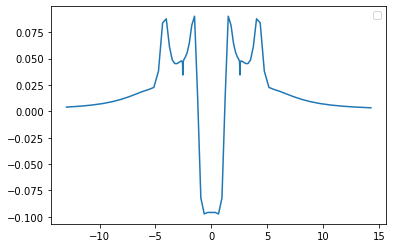

In [6]:
x,d1 = grid.axis_plot(part.nf[:,0])
x,d2 = grid.axis_plot(part.nf[:,1])

x,pot = grid.axis_plot(part.V.vp_pot[:,0])
x,hxc = grid.axis_plot(part.V.vp_hxc[:,0])
x,har = grid.axis_plot(part.V.vp_h[:,0])
x, xc = grid.axis_plot(part.V.vp_x[:,0] + part.V.vp_x[:,1])
x, vp = grid.axis_plot(part.V.vp[:,0])

x, xca = grid.axis_plot(part.KSA.V.vx[:,0] + part.KSA.V.vc[:,0])
x, xcb = grid.axis_plot(part.KSB.V.vx[:,0] + part.KSB.V.vc[:,0])

# plt.plot(x, pot)
# plt.plot(x, har)
plt.plot(x, vp)

plt.legend()

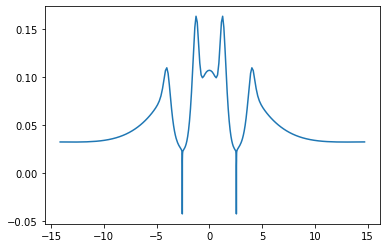

In [ ]:
h_energy = part.E.Ea
plt.scatter(distances, part.E.E - 2 * h_energy)
plt.axhline(y=0, alpha=0.5, c="grey", ls=":")
# plt.ylim(-.2,.1)